# 5º período - Redes Neurais Convolucionais (CNN)

Como no último período já foram explicadas as Redes Neurais (NN), o foco desse relatório será na diferença das Redes Neurais para as Redes Neurais Convolucionais, além da adição de alguns novos termos: 
- Convolução;
- Dropout;
- Pooling;
- Batch Normalization;
- Callbacks;
- Transfer Learning;
- Freezing Layers;

## Convolução

Para começarmos a falar de CNN, vamos explicar o conceito de convolução. 

Convolução é uma operação matemática formal, que toma dois sinais para gerar um terceiro. É  a representação matemática de como uma transformação linear (sistema linear) opera sobre um sinal: o sinal de saída é o resultado da convolução do sinal de entrada (input) com a resposta a impulso do sistema (output). 

No processamento de imagem, principal aplicação das Redes Neurais Convolucionais, a resposta a impulso do sistema (output) tem o nome de função de espalhamento de ponto (point spread function).

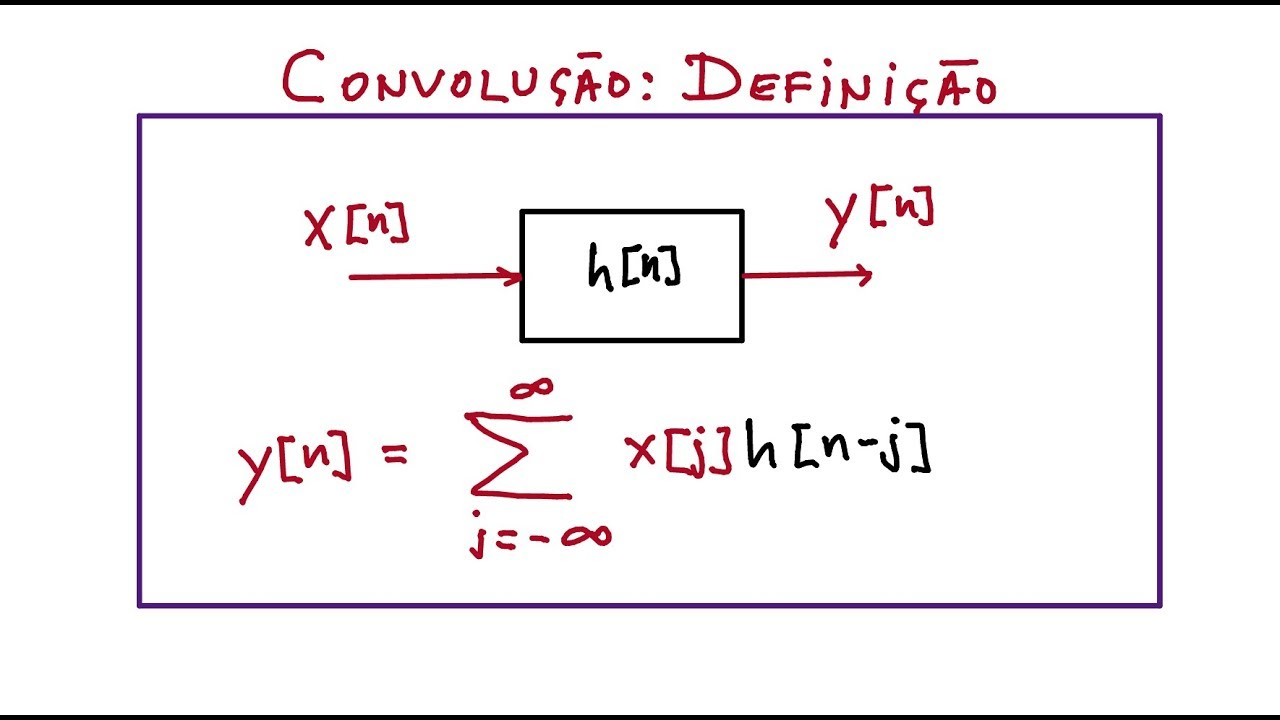

## Diferenças das Redes Neurais e as CNN

Começando com as duas principais diferenças das duas arquiteturas das redes, as CNN, diferentemente das NN, as camadas das Redes Neurais Convolucionais não são totalmente conectadas, ou seja, a quantidade de parâmetros diminui muito nas CNN porque a camada anterior não está conectada totalmente com a próxima camada (por exemplo: Input Layer e Dense Layer).

A segunda principal diferença é no formato (shape) dos dados, também chamado de input, nas Redes Neurais, uma imagem em formato 2d de pixels é compactada para um vetor, o que prejudica o aprendizado da máquina em imagens mais complexas, já que ela trata a relação de pixels que estão em lados opostos e pixels que estão lado a lado como sendo iguais. Nas CNN, teremos essa vantagem do input em 2d, as vezes, mais do que só um input em 2d, como no caso das imagens coloridas que são em RGB, ou seja, são três entradas de pixels em 2d, uma com um tom de vermelho, outra verde e a última em azul.

## Estrutura de uma Rede Neural Convolucional

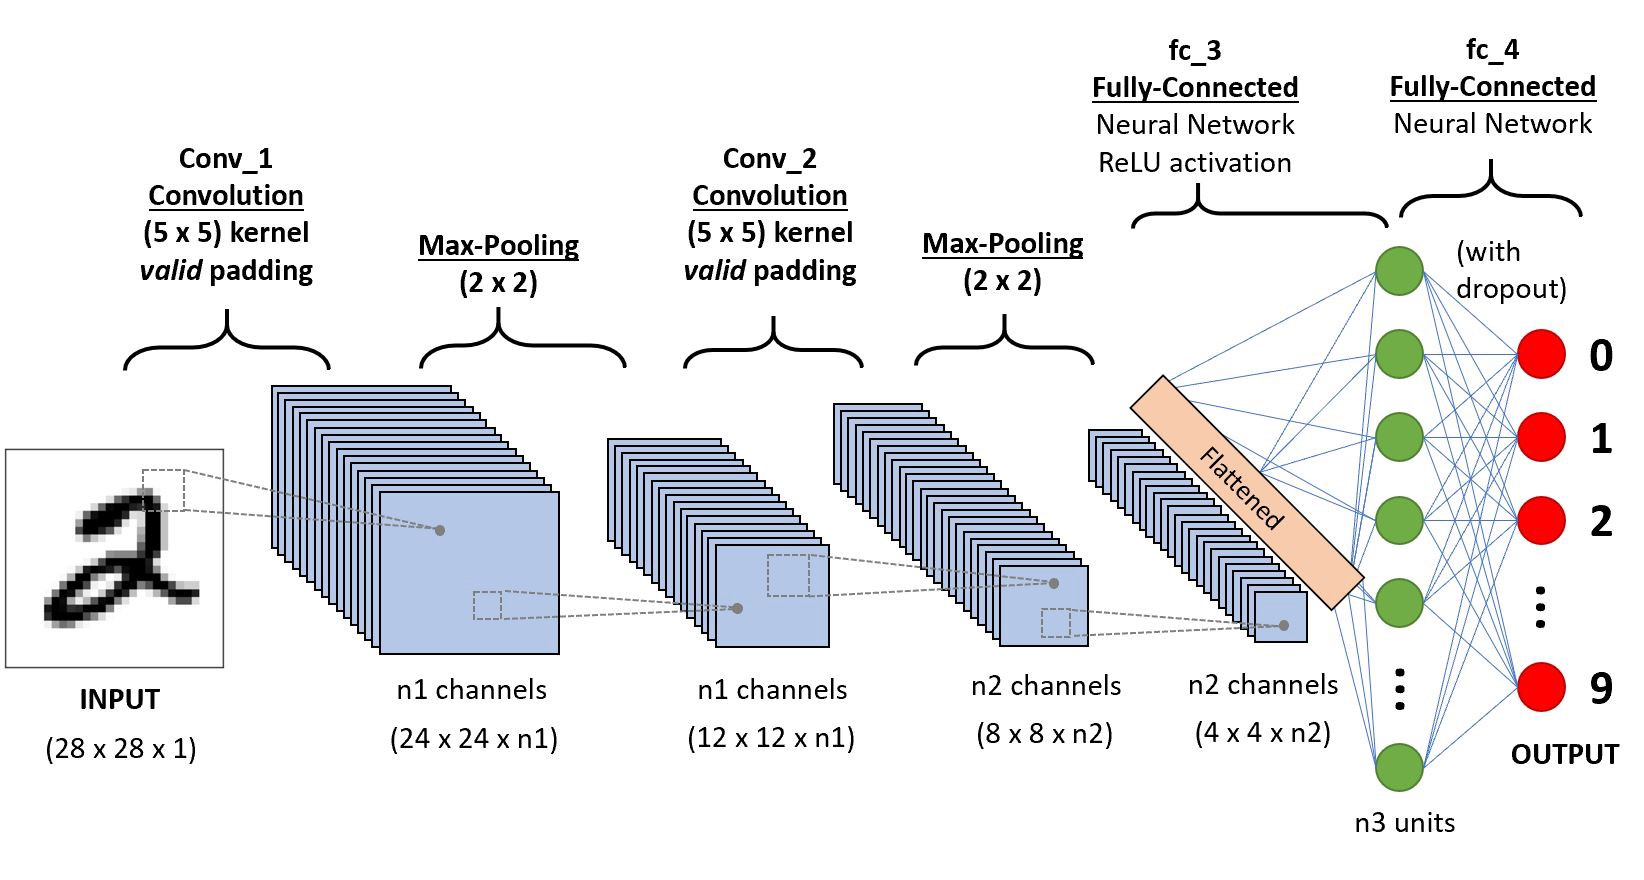

A **primeira camada** é a camada de Input, sem nenhum viés ou peso, sendo ela composta somente pelos pixels em 2d (ou as três camadas de pixels 2d). 

A **segunda camada** é a Camada Oculta, sabemos que ela não é uma camada totalmente conectada, ou seja, cada neurônio está responsável por uma parte da camada de input, e não por ela inteira. Ou seja, se o input é uma imagem de 64x64 pixels, cada neurônio é responsável, por exemplo, por 5x5 pixels. E os pesos e viés desse neurônio são um somatório de 5x5 pesos e somente um viés. A construção de vários neurônios forma um Mapa de Recursos (Mapa de Características), e um conjunto de Mapa de Recursos forma a Camada Oculta, como é mostrado na imagem. 

A **terceira camada** é chamada a camada de *Pooling*, ela recebe como entrada o Mapa de Recursos da camada oculta e condensa as informações do Mapa para simplificar a leitura e aprendizado da máquina. Por exemplo, ela recebe uma entrada de 5x5 pixels da camada oculta e transforma em uma saída 2x2. São duas as principais técnicas de *Pooling*: *Max-Pooling* (uma unidade de pooling simplesmente gera a ativação máxima na região de entrada 2×2) e *Pooling L2* (toma-se a raiz quadrada da soma dos quadrados das ativações na região 2×2). As duas técnicas possuem a mesma finalidade: Condensar as informações da camada oculta.

Uma Rede Neural Convolucional é composta por uma sequência de Camadas Ocultas e Camadas de Pooling, e finalmente a camada final de conexões na rede é uma camada totalmente conectada. Ou seja, essa camada conecta todos os neurônios da camada de Pooling a cada um dos 10 neurônios de saída. Essa arquitetura totalmente conectada é a mesma que usamos no relatório anterior.

## Termos faltantes

- **Dropout**: Um método para diminuir e evitar o Overfit do aprendizado da máquina, desativa uma % dos neurônios da camada aleatoriamente.

- **Batch Normalization**: Técnica de normalização realizada entre as camadas de uma rede neural, é feita entre os mini-batches. Usado para aumentar a learning-rate e melhora o tempo de treino, faz o aprendizado ser mais fácil.

- **Callbacks**: Uma série de métodos/critérios utilizados para definir uma parada para o treinamento do modelo, também usado para evitar Overfitting.

- **Transfer Learning**: Utilização de uma Rede já treinada anteriormente e agora com seus pesos e vieses transferidos para uma nova Rede, utilizada geralmente em casos que não existe um banco de dados volumoso o suficiente para garantir um bom aprendizado de máquina;

- **Freezing Layers**: Mais um método para evitar o Overfit do modelo, congela-se uma camada (ou seja, impede que seus pesos e viés sejam atualizados), o que ganha em tempo computacional e a acurácia não é tão afetada (em redes mais complexas).

# CNN para Classificação de Cachorros, Gatos e Pandas

In [11]:
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Importando as bibliotecas necessárias

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/animals'

Mounted at /content/gdrive


Pegando as imagens no google drive

Agora, montaremos a arquitetura da nossa Rede Neural Convolucional:

In [14]:

cl = Sequential([
                 Dropout(0.25, input_shape = (150, 150, 3)),
                 Conv2D(32,(5,5), activation = 'relu', input_shape = (150, 150, 3)),
                 MaxPooling2D(2,2),
                 BatchNormalization(),
                 Conv2D(32,(5,5), activation = 'sigmoid'),
                 MaxPooling2D(2,2),
                 BatchNormalization(),
                 Flatten(),
                 Dropout(.25),
                 Dense(32, activation = tf.nn.relu),
                 Dense(3, activation = tf.nn.softmax)
])

#cl = Sequential()
#cl.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (256, 256, 3)))
#cl.add(AveragePooling2D(2,2))
#cl.add(BatchNormalization())
#cl.add(Conv2D(32,(5,5), activation = 'sigmoid'))
#cl.add(AveragePooling2D(2,2))
#cl.add(BatchNormalization())
#cl.add(Flatten())
#cl.add(Dense(32, activation = tf.nn.relu))

opt = Adam(learning_rate=0.001)
cl.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

cl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 150, 150, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 73, 73, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 69, 69, 32)        25632     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 34, 34, 32)      

## Pré processamento de imagens

O pré processamento das imagens constitui-se em padronizar (ou também, "normalizar") de alguma forma os dados antes que o modelo as utilize para treinar. Em resumo, é ajustar escala e zoom das imagens de treino e a escala das imagens de validação.

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=.2
                                   )

In [6]:
training_set = train_datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='training', interpolation='nearest'
)

validation_set = train_datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='validation', interpolation='nearest'
)

testing_set = train_datagen.flow_from_directory(
    dataset_path, target_size=(150,150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='validation', interpolation='nearest'
)

Found 2408 images belonging to 3 classes.
Found 602 images belonging to 3 classes.
Found 602 images belonging to 3 classes.


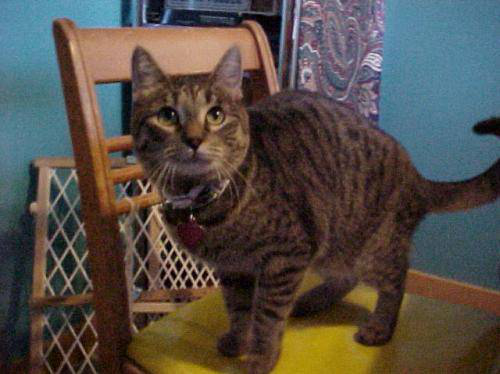

In [ ]:
image.load_img('/content/gdrive/MyDrive/animals/cats/cats_00001.jpg')

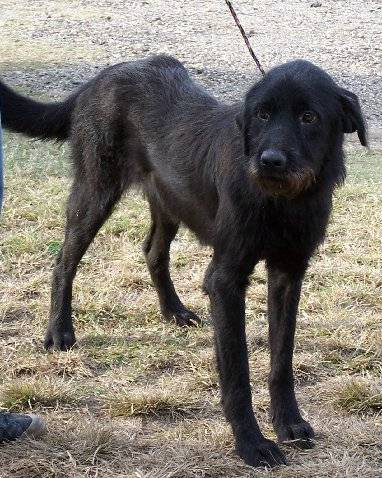

In [ ]:
image.load_img('/content/gdrive/MyDrive/animals/dogs/dogs_00001.jpg')

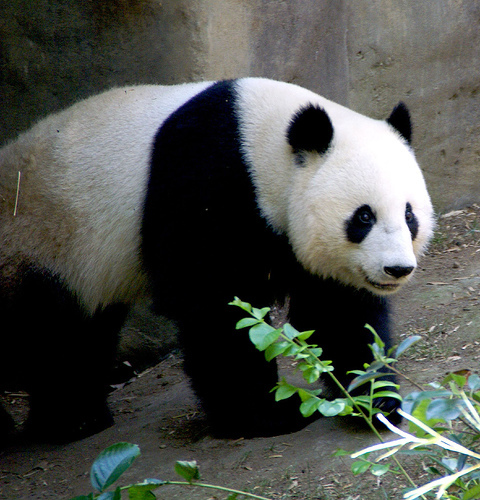

In [ ]:
image.load_img('/content/gdrive/MyDrive/animals/panda/panda_00001.jpg')

In [ ]:
cl.fit(training_set,
    epochs = 30,
    steps_per_epoch = training_set.samples // 32,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // 32,
    callbacks=[EarlyStopping(monitor='loss', patience=2, min_delta = 10**-4)])

Epoch 1/20
75/75 [==============================] - 199s 3s/step - loss: 4.4240 - accuracy: 0.5556 - val_loss: 8.0031 - val_accuracy: 0.3333
Epoch 2/20
75/75 [==============================] - 37s 488ms/step - loss: 2.3472 - accuracy: 0.6061 - val_loss: 3.0232 - val_accuracy: 0.3385
Epoch 3/20
75/75 [==============================] - 36s 483ms/step - loss: 1.6512 - accuracy: 0.6309 - val_loss: 0.9573 - val_accuracy: 0.5104
Epoch 4/20
75/75 [==============================] - 35s 474ms/step - loss: 1.0090 - accuracy: 0.6389 - val_loss: 0.9493 - val_accuracy: 0.5573
Epoch 5/20
75/75 [==============================] - 36s 479ms/step - loss: 0.7578 - accuracy: 0.6671 - val_loss: 1.1081 - val_accuracy: 0.4774
Epoch 6/20
75/75 [==============================] - 36s 478ms/step - loss: 0.6855 - accuracy: 0.6907 - val_loss: 1.0419 - val_accuracy: 0.4965
Epoch 7/20
75/75 [==============================] - 37s 489ms/step - loss: 0.6045 - accuracy: 0.7205 - val_loss: 1.0648 - val_accuracy: 0.5243
E

# Transfer Learning para Classificação de Cachorros, Gatos e Pandas

Para utilizar o Transfer Learning, pegaremos uma Rede já treinada, congelaremos as camadas já treinadas (para evitar que seus pesos e viés mudem), e então adicionaremos outras camadas treináveis no modelo para que possamos testar a acurácia da classificação do modelo.

In [18]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import efficientnet

TM1 = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

TM2 = efficientnet.EfficientNetB5(
    include_top=True, weights=None, input_tensor=None,
    input_shape=(150, 150, 3), pooling=None, classes=3,
    classifier_activation='softmax')

Após análise, não utilizei o Transfered Model 2 (TM2) por não obter resultados satisfatórios como o Transfered Model 1 (TM1)

Agora, congelaremos as camadas dos dois modelos pré-treinados

In [19]:
for layer in TM1.layers[:]:
    layer.trainable = False

for layer in TM2.layers[:]:
    layer.trainable = False

Checando se as camadas ainda são treináveis:

In [20]:
for layer in TM1.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f991cf3eb10> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf3e910> False
<keras.layers.convolutional.Conv2D object at 0x7f999009fe50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f991cf4a890> False
<keras.layers.convolutional.Conv2D object at 0x7f991cfb90d0> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf4f1d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f991cf5a190> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf56910> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf4f590> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf97350> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9990045090> False
<keras.layers.convolutional.Conv2D object at 0x7f991cf906d0> False
<keras.layers.convolutional.Conv2D object at 0x7f999004ed10> False
<keras.layers.convolutional.Conv2D object at 0x7f999008dcd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9990097650>

Agora, criando um novo modelo para adicionarmos ao Transfered Model 1:

In [27]:
model = Sequential()

model.add(TM1)
model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(32, activation = tf.nn.relu))
model.add(Dense(3, activation = tf.nn.softmax))

opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_14 (Dropout)        (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                262176    
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,976,963
Trainable params: 262,275
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
model.fit(training_set,
    epochs = 10,
    steps_per_epoch = training_set.samples // 32,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // 32,
    callbacks=[EarlyStopping(monitor='loss', patience=2, min_delta = 10**-4)])

Epoch 1/10
75/75 [==============================] - 549s 7s/step - loss: 1.4172 - accuracy: 0.3472 - val_loss: 1.0987 - val_accuracy: 0.3351
Epoch 2/10
75/75 [==============================] - 39s 514ms/step - loss: 1.0993 - accuracy: 0.3262 - val_loss: 1.0987 - val_accuracy: 0.3316
Epoch 3/10
75/75 [==============================] - 39s 515ms/step - loss: 1.0994 - accuracy: 0.3253 - val_loss: 1.0988 - val_accuracy: 0.3299
Epoch 4/10
75/75 [==============================] - 38s 508ms/step - loss: 1.0996 - accuracy: 0.3253 - val_loss: 1.0987 - val_accuracy: 0.3333


Aqui, hoive uma parada do modelo por conta do Callback definido, o qual o mínimo de perda da Loss para ser considerada perda era de $ 10^{-4} $ , e se houvessem 2 etapas que não houvesse perda da Loss maior que esse mínimo, o processo seria parado. Acredita-se que isso ocorreu por existirem poucas camadas, então adicionaremos mais na próxima tentativa e aumentaremos a taxa de aprendizado

In [35]:
model = Sequential()

model.add(TM1)
model.add(Flatten())
model.add(Dropout(.4))
model.add(Dense(1024, activation = tf.nn.relu))
model.add(Dense(512, activation = tf.nn.relu))
model.add(Dense(250, activation = tf.nn.relu))
model.add(Dropout(.2))
model.add(Dense(100, activation = tf.nn.relu))
model.add(Dense(3, activation = tf.nn.softmax))

opt = Adam(learning_rate=0.02)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_22 (Dropout)        (None, 8192)              0         
                                                                 
 dense_33 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dense_35 (Dense)            (None, 250)               128250    
                                                                 
 dropout_23 (Dropout)        (None, 250)             

In [36]:
model.fit(training_set,
    epochs = 10,
    steps_per_epoch = training_set.samples // 32,
    validation_data = validation_set, 
    validation_steps = validation_set.samples // 32,
    callbacks=[EarlyStopping(monitor='loss', patience=2, min_delta = 10**-4)])

Epoch 1/10
75/75 [==============================] - 41s 528ms/step - loss: 20.9782 - accuracy: 0.5770 - val_loss: 0.7255 - val_accuracy: 0.6736
Epoch 2/10
75/75 [==============================] - 38s 504ms/step - loss: 0.5837 - accuracy: 0.7652 - val_loss: 0.3927 - val_accuracy: 0.8438
Epoch 3/10
75/75 [==============================] - 38s 506ms/step - loss: 0.9125 - accuracy: 0.6869 - val_loss: 0.6088 - val_accuracy: 0.7934
Epoch 4/10
75/75 [==============================] - 38s 506ms/step - loss: 0.5209 - accuracy: 0.7955 - val_loss: 0.5421 - val_accuracy: 0.7812
Epoch 5/10
75/75 [==============================] - 38s 507ms/step - loss: 0.4156 - accuracy: 0.8401 - val_loss: 0.3509 - val_accuracy: 0.8698
Epoch 6/10
75/75 [==============================] - 38s 506ms/step - loss: 0.3743 - accuracy: 0.8544 - val_loss: 0.3427 - val_accuracy: 0.8576
Epoch 7/10
75/75 [==============================] - 38s 505ms/step - loss: 0.3435 - accuracy: 0.8763 - val_loss: 0.4153 - val_accuracy: 0.854